**Machine Learning Lab (PMCA507P)**

> **Reg No:** 23MCA1030

>**Name :**  Vinayak Kumar Singh

**Exercise 5b : Decision Tree Classifier (Split the data set)**

**Collab url :** https://colab.research.google.com/drive/1DaWfAzQzPKGcdO23_1fKaok9w698DYT2?usp=sharing


---

In [ ]:
import numpy as np
import pandas as pd
from sklearn import metrics

In [ ]:
df=pd.read_csv("/content/PlayTennis.csv")
value=['Outlook','Temperature','Humidity','Wind']
df

,Outlook,Temperature,Humidity,Wind,Play
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [ ]:
len(df)

14

In [ ]:
df.shape

(14, 5)

In [ ]:
df.head()

,Outlook,Temperature,Humidity,Wind,Play
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes


In [ ]:
df.tail()

,Outlook,Temperature,Humidity,Wind,Play
9,Rain,Mild,Normal,Weak,Yes
10,Sunny,Mild,Normal,Strong,Yes
11,Overcast,Mild,High,Strong,Yes
12,Overcast,Hot,Normal,Weak,Yes
13,Rain,Mild,High,Strong,No


In [ ]:
df.describe()

,Outlook,Temperature,Humidity,Wind,Play
count,14,14,14,14,14
unique,3,3,2,2,2
top,Sunny,Mild,High,Weak,Yes
freq,5,6,7,8,9


In [ ]:
from sklearn import preprocessing
string_to_int= preprocessing.LabelEncoder()
df=df.apply(string_to_int.fit_transform)
df

,Outlook,Temperature,Humidity,Wind,Play
0,2,1,0,1,0
1,2,1,0,0,0
2,0,1,0,1,1
3,1,2,0,1,1
4,1,0,1,1,1
5,1,0,1,0,0
6,0,0,1,0,1
7,2,2,0,1,0
8,2,0,1,1,1
9,1,2,1,1,1


In [ ]:
feature_cols =['Outlook','Temperature','Humidity','Wind']
X = df[feature_cols]
y = df.Play

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier =DecisionTreeClassifier(criterion="entropy", random_state=100)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=100)

In [ ]:
y_pred= classifier.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8


In [ ]:
data_p=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
data_p

,Actual,Predicted
9,1,1
2,1,1
0,0,0
13,0,1
4,1,1


 Evaluating the Algorithm

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1 1]
 [0 3]]
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.75      1.00      0.86         3

    accuracy                           0.80         5
   macro avg       0.88      0.75      0.76         5
weighted avg       0.85      0.80      0.78         5



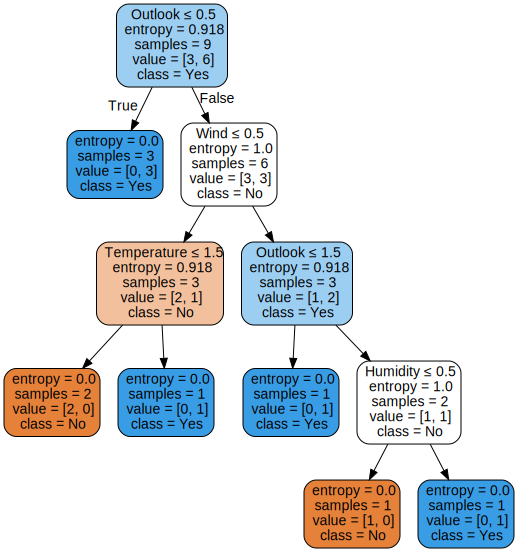

In [ ]:
from sklearn.tree import export_graphviz
import graphviz
dot_data = export_graphviz(classifier, out_file=None, feature_names=feature_cols, class_names=['No', 'Yes'], filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph
